In [1]:
%reload_ext autoreload
%autoreload 1
%matplotlib inline
%aimport display, solvers
%aimport paper
from display import *

import solvers

/nix/store/nslq0m341apxj7h2mx0nqabhk10wj4wd-python3-3.7.5-env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/nix/store/nslq0m341apxj7h2mx0nqabhk10wj4wd-python3-3.7.5-env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/nix/store/nslq0m341apxj7h2mx0nqabhk10wj4wd-python3-3.7.5-env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = n

# Arithmetic solvers

## Multiplication

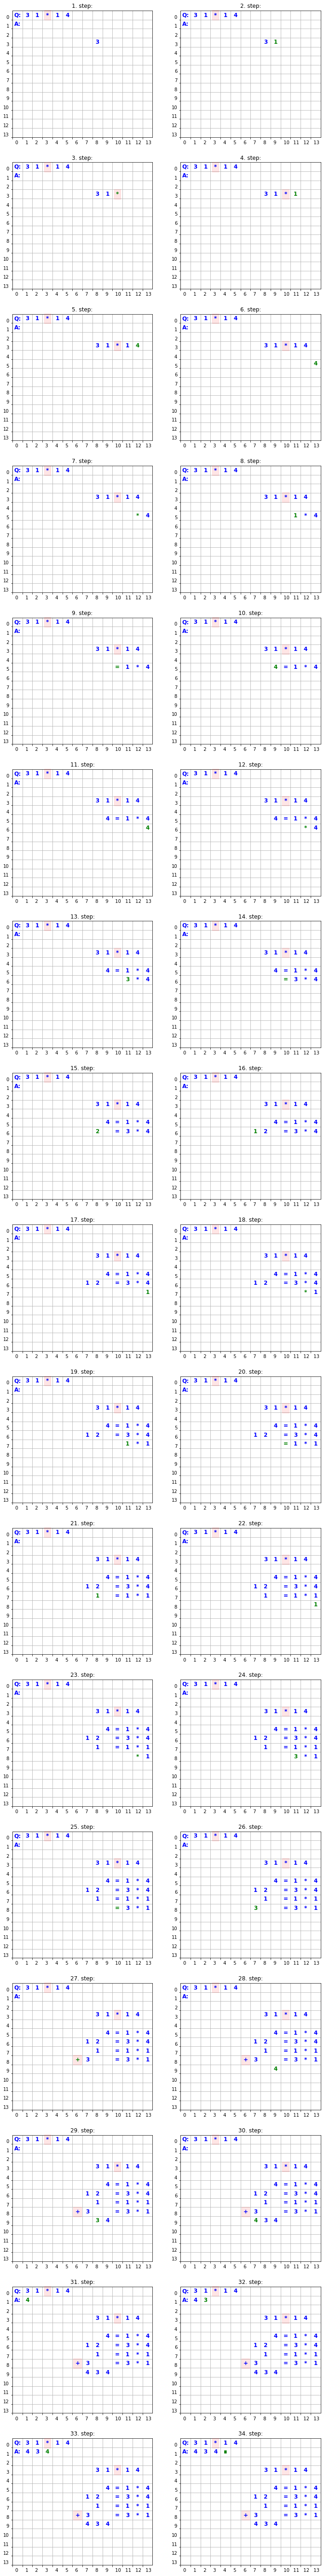

In [2]:
plot_example_md('arithmetic__mul', Solver=solvers.MultiplySolver2, entropy_args=(0,1),
               skip_ntypes=())

## Add or Sub Solver

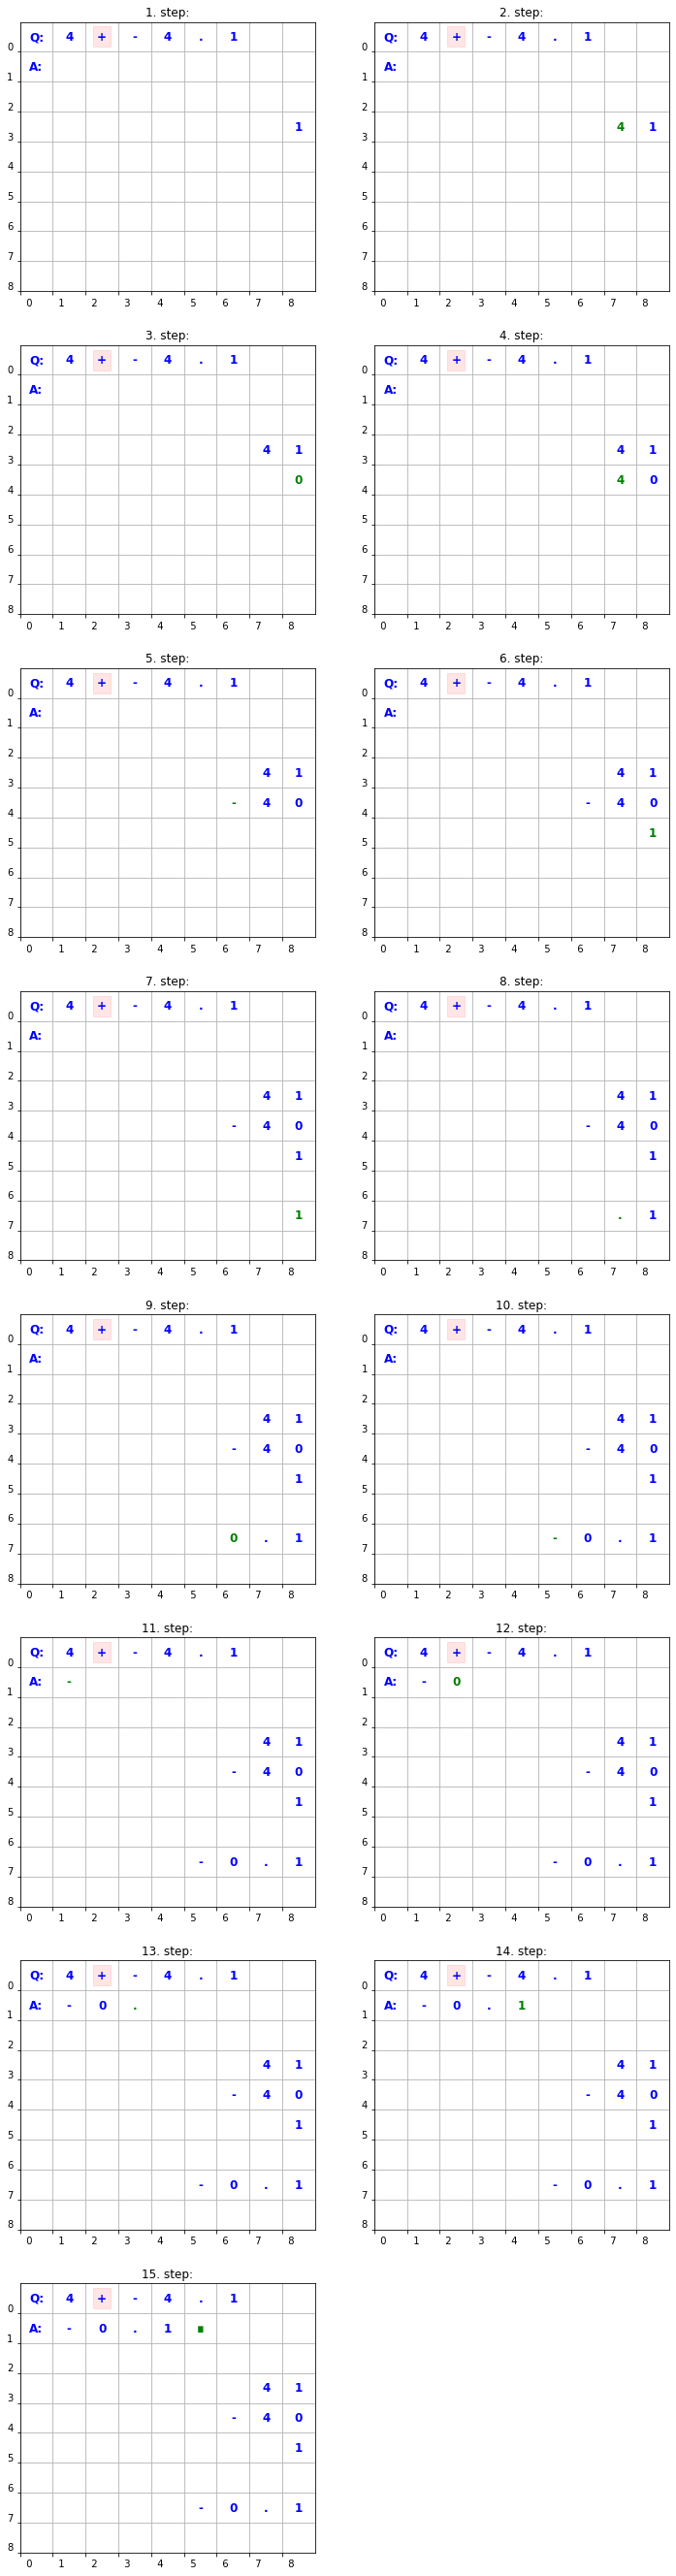

In [3]:
plot_example_md('arithmetic__add_or_sub', entropy_args=(0,1),
               skip_ntypes=())

# Comparisons

## SortSolver (TODO)

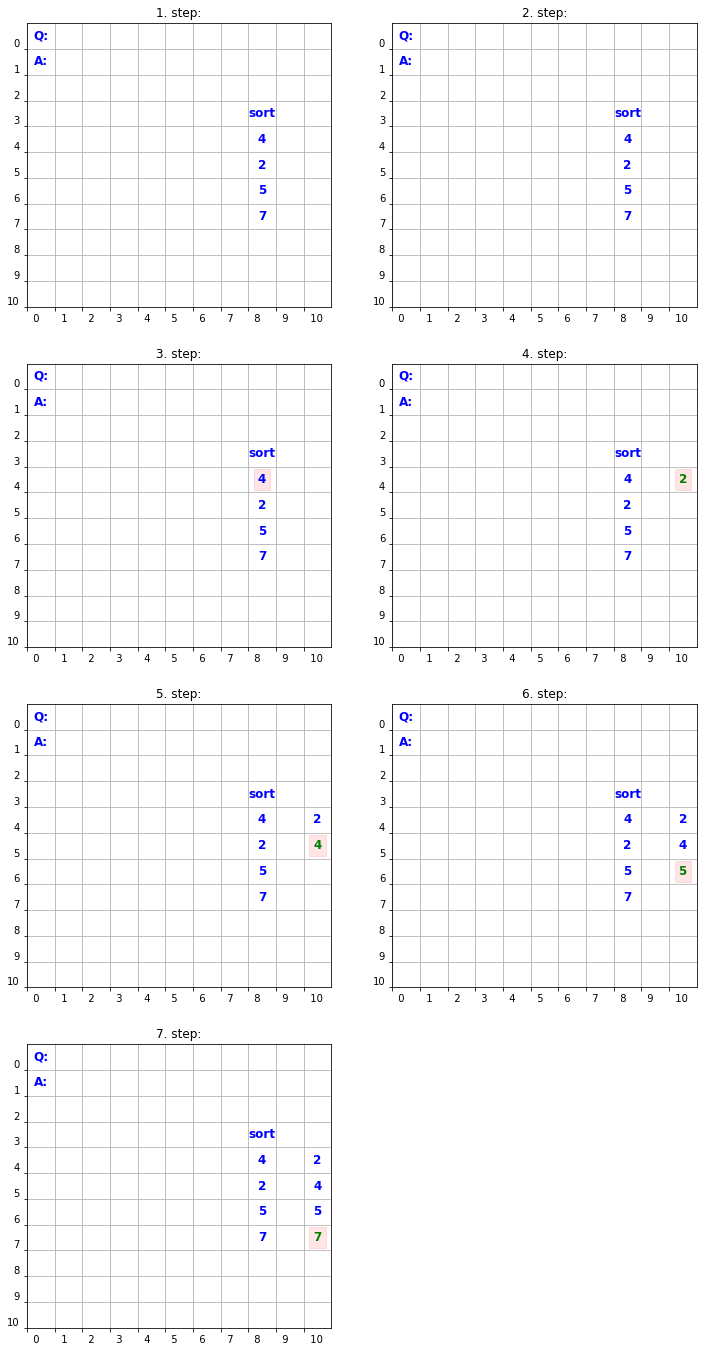

In [5]:
plot_example_md('comparison__sort', Solver=solvers.SortSolver, entropy_args=(0,1),
               skip_ntypes=('decimal', 'rational'))